# Importing Dependencies

In [2]:
# importing necessary packages for data manipulation
import re 
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import urllib 
import requests
import operator
%matplotlib inline
# NLP
from wordcloud import WordCloud, STOPWORDS # filtered out before and after processing natural language
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from PIL import Image
# Feature Importance 
from sklearn.ensemble import GradientBoostingClassifier
from yellowbrick.features.importances import FeatureImportances
# Text Similarity
from yellowbrick.text import TSNEVisualizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Data Cleaning

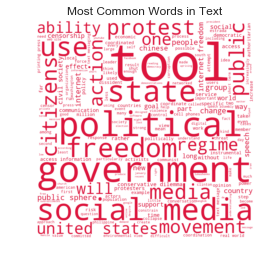

In [3]:
# Feature extraction from long answer for BTG
def cleaning_text(text): # https://www.kaggle.com/rhodiumbeng/classifying-multi-label-comments-0-9741-lb
# utilize re package as a means of substituting informal contractions with separated words
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text
def unique_vocabulary(text):
    vectorizer = CountVectorizer()
    vectorizer.fit_transform(text).todense()
    return vectorizer.vocabulary_
def color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "Crimson"
def wordCloud(text, color = 'white'):
    word = " ".join([word for word in text.split()
                    if "<" not in word and
                     ">" not in word and
                     "-" not in word and
                     "\\" not in word])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color="white",
                      width=1000,
                      height=1000).generate(word)
                     #mask=mask).generate(word)
    plt.imshow(wordcloud.recolor(color_func = color_func), interpolation='bilinear')
    plt.axis('off')
    plt.title("Most Common Words in Text")
    plt.show()
def readFile(path):
    with open(path) as f:
        content = f.read()
    return content
text_expert = readFile("./expert_resistance.txt").lower()
def main():
    wordCloud(text_expert)
if __name__ == "__main__": main()

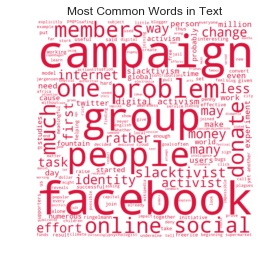

In [8]:
text_non_expert = readFile("./Morozov.txt").lower()
wordCloud(text_non_expert)

In [4]:
# Text of Political Protest and the Public Sphere
textPublicSphere = """On January 17, 2001, during the impeachment trial of Philippine President Joseph Estrada, loyalists in the Philippine Congress voted to set aside key evidence against him.  Less than two hours after the decision was announced, thousands of Filipinos, angry that their corrupt president might be let off the hook, converged on Epifanio de los Santos Avenue, a major crossroads in Manila.  The protest was arranged, in part, by forwarded text messages reading, “Go 2 EDSA.  Wear blk.”The crowd quickly swelled, and in the next few days, over a million people arrived, choking traffic in downtown Manila.  The public’s ability to coordinate such a massive and rapid response—close to seven million text messages were sent that week—so alarmed the country’s legislators that they reversed course and allowed the evidence to be presented.  Estrada’s fate was sealed; by January 20, he was gone.  The event marked the first time that social media had helped force out a national leader.  Estrada himself blamed “the text-messaging generation”for his downfall.Since the rise of the Internet in the early 1990s, the world’s networked population has grown from the low millions to the low billions.  Over the same period, social media have become a fact of life for civil society worldwide, involving many actors—regular citizens, activists, nongovernmental organizations, telecommunications firms, software providers, governments.  This raises an obvious question for the U.S. 1CLAY SHIRKY is Professor of New Media at New York University and the author of Cognitive Surplus:  Creativity and Generosity in a Connected Age.
government: How does the ubiquity of social media affect U.S. interests, and how should U.S. policy respond to it?As the communications landscape gets denser, more complex, and more participatory, the networked population is gaining greater access to information, more opportunities to engage in public speech, and an enhanced ability to undertake collective action.  In the political arena, as the protests in Manila demonstrated, these increased freedoms can help loosely coordinated publics demand change.The Philippine strategy has been adopted many times since.  In some cases, the protesters ultimately succeeded, as in Spain in 2004, when demonstrations organized by text messaging led to the quick ouster of Spanish Prime Minister José María Aznar, who had inaccurately blamed the Madrid transit bombings on Basque separatists.  The Communist Party lost power in Moldova in 2009 when massive protests coordinated in part by text message, Facebook, and Twitter broke out after an obviously fraudulent election.  Around the world, the Catholic Church has faced lawsuits over its harboring of child rapists, a process that started when The Boston Globe’s 2002 exposé of sexual abuse in the church went viral online in a matter of hours.There are, however, many examples of the activists failing, as in Belarus in March 2006, when street protests (arranged in part by e-mail) against President Aleksandr Lukashenko’s alleged vote rigging swelled, then faltered, leaving Lukashenko more determined than ever to control social media.  During the June 2009 uprising of the Green Movement in Iran, activists used every possible technological coordinating tool to protest the miscount of votes for Mir Hossein Mousavi but were ultimately brought to heel by a violent crackdown.  The Red Shirt uprising in Thailand in 2010 followed a similar but quicker path:  protesters savvy with social media occupied downtown Bangkok until the Thai government dispersed the protesters, killing dozens.The use of social media tools—text messaging, e-mail, photo sharing, social networking, and the like—does not have a single preordained outcome.  Therefore, attempts to outline their effects on political action are too often reduced to dueling anecdotes.  If you regard the failure of the Belarusian protests to oust Lukashenko as paradigmatic, you will regard the Moldovan experience as an outlier, and vice versa.  Empirical work on the subject is also hard to come by, in part because these tools are so new and in part because relevant examples are so rare.  The safest characterization of recent quantitative attempts to answer the question, Do digital tools enhance democracy?  (such as those by Jacob Groshek and Philip Howard) is that these tools probably do not hurt in the short run and might help in the long run—and that they have the most dramatic effects in states where a public sphere already constrains the actions of the government.The potential of social media lies mainly in their support of civil society and the public sphere.
Despite this mixed record, social media have become coordinating tools for nearly all of the world’s political movements, just as most of the world’s authoritarian governments (and, alarmingly, an increasing number of democratic ones) are trying to limit access to it.  In response, the U.S. State Department has committed itself to “Internet freedom”as a specific policy aim.  Arguing for the right of people to use the Internet freely is an appropriate policy for the United States, both because it aligns with the strategic goal of strengthening civil society worldwide and because it resonates with American beliefs about freedom of expression.  But attempts to yoke the idea of Internet freedom to short-term goals—particularly ones that are country-specific or are intended to help particular dissident groups or encourage regime change—are likely to be ineffective on average.  And when they fail, the consequences can be serious.Although the story of Estrada’s ouster and other similar events have led observers to focus on the power of mass protests to topple governments, the potential of social media lies mainly in their support of civil society and the public sphere—change measured in years and decades rather than weeks or months.  The U.S. government should maintain Internet freedom as a goal to be pursued in a principled and regime-neutral fashion, not as a tool for effecting immediate policy aims country by country.  It should likewise assume that progress will be incremental and, unsurprisingly, slowest in the most authoritarian regimes.The Perils ofInternet FreedomIn January 2010, U.S. Secretary of State Hillary Clinton outlined how the United States would promote Internet freedom abroad.  She emphasized several kinds of freedom, including the freedom to access information (such as the ability to use Wikipedia and Google inside Iran), the freedom of ordinary citizens to produce their own public media (such as the rights of Burmese activists to blog), and the freedom of citizens to converse with one another (such as the Chinese public’s capacity to use instant messaging without interference).Most notably, Clinton announced funding for the development of tools designed to reopen access to the Internet in countries that restrict it.  This “instrumental”approach to Internet freedom concentrates on preventing states from censoring outside Web sites, such as Google, YouTube, or that of The New York Times.  It focuses only secondarily on public speech by citizens and least of all on private or social uses of digital media.  According to this vision, Washington can and should deliver rapid, directed responses to censorship by authoritarian regimes.The instrumental view is politically appealing, action-oriented, and almost certainly wrong.  It overestimates the value of broadcast media while underestimating the value of media that allow citizens to communicate privately among themselves.  It overestimates the value of access to information, particularly information hosted in the West, while underestimating the value of tools for local coordination.  And it 
overestimates the importance of computers while underestimating the importance of simpler tools, such as cell phones.The instrumental approach can also be dangerous.  Consider the debacle around the proposed censorship-circumvention software known as Haystack, which, according toits developer, was meant to be a “one-to-one match for how the [Iranian] regime implements censorship.”The tool was widely praised in Washington; the U.S. government even granted it an export license.  But the program was never carefully vetted, and when security experts examined it, it turned out that it not only failed at its goal of hiding messages from governments but also made it, in the words of one analyst, “possible for an adversary to specifically pinpoint individual users.”In contrast, one of the most successful anti-censorship software programs, Freegate, has received little support from the United States, partly because of ordinary bureaucratic delays and partly because the U.S. government is wary of damaging U.S.-Chinese relations:  the tool was originally created by Falun Gong, the spiritual movement that the Chinese government has called “an evil cult.”The challenges of Freegate and Haystack demonstrate how difficult it is to weaponize social media to pursue country-specific and near-term policy goals.New media conducive to fostering participation can indeed increase the freedoms Clinton outlined, just as the printing press, the postal service, the telegraph, and the telephone did before.  One complaint about the idea of new media as a political force is that most people simply use these tools for commerce, social life, or self-distraction, but this is common to all forms of media.  Far more people in the 1500s were reading erotic novels than Martin Luther’s “Ninety-five Theses,”and far more people before the American Revolution were reading Poor Richard’s Almanack than the work of the Committees of Correspondence.  But those political works still had an enormous political effect.Just as Luther adopted the newly practical printing press to protest against the Catholic Church, and the American revolutionaries synchronized their beliefs using the postal service that Benjamin Franklin had designed, today’s dissident movements will use any means possible to frame their views and coordinate their actions; it would be impossible to describe the Moldovan Communist Party’s loss of Parliament after the 2009 elections without discussing the use of cell phones and onlinetools by its opponents to mobilize.  Authoritarian governments stifle communication among their citizens because they fear, correctly, that a better-coordinated populace would constrain their ability to act without oversight.Despite this basic truth—that communicative freedom is good for political freedom—the instrumental mode of Internet statecraft is still problematic.  It is difficult for outsiders to understand the local conditions of dissent.  External support runs the risk of tainting even peaceful opposition as being directed by foreign elements.  Dissidents can be exposed by the unintended effects of novel tools.  A government’s demands for Internet freedom Access to information is far less important, politically, than access to conversation.
abroad can vary from country to country, depending on the importance of the relationship, leading to cynicism about its motives.The more promising way to think about social media is as long-term tools that can strengthen civil society and the public sphere.  In contrast to the instrumental view of Internet freedom, this can be called the “environmental”view.  According to this conception, positive changes in the life of a country, including pro-democratic regime change, follow, rather than precede, the development of a strong public sphere.  This is not to say that popular movements will not successfully use these tools to discipline or even oust their governments, but rather that U.S. attempts to direct such uses are likely to do more harm than good.  Considered in this light, Internet freedom is a long game, to be conceived of and supported not as a separate agenda but merely as an important input to the more fundamental political freedoms.The Theater of CollapseAny discussion of political action in repressive regimes must take into account the astonishing fall of communism in 1989 in easternEurope and the subsequent collapse of the Soviet Union in 1991.  Throughout the Cold War, the United States invested in a variety of communications tools, including broadcasting the Voice of America radio station, hosting an American pavilion in Moscow (home of the famous Nixon-Khrushchev “kitchen debate”), and smuggling Xerox machines behind the Iron Curtain to aid the underground press, or samizdat.  Yet despite this emphasis on communications, the end of the Cold War was triggered not by a defiant uprising of Voice of America listeners but by economic change.  As the price of oil fell while that of wheat spiked, the Soviet model of selling expensive oil to buy cheap wheat stopped working.  As a result, the Kremlin was forced to secure loans from the West, loans that would have been put at risk had the government intervened militarily in the affairs of non-Russian states.  In 1989, one could argue, the ability of citizens to communicate, considered against the background of macroeconomic forces, was largely irrelevant.But why, then, did the states behind the Iron Curtain not just let their people starve?  After all, the old saying that every country is three meals away from revolution turned out to be sadly incorrect in the twentieth century; it is possible forleaders to survive even when millions die.  Stalin did it in the 1930s, Mao did it in the 1960s, and Kim Jong Il has done it more than once in the last two decades.  But the difference between those cases and the 1989 revolutions was that the leaders of East Germany, Czechoslovakia, and the rest faced civil societies strong enough to resist.  The weekly demonstrations in East Germany, the Charter 77 civic movement in Czechoslovakia, and the Solidarity movement in Poland all provided visible governments in waiti ng.The ability of these groups to create and disseminate literature and political documents, even with simple photocopiers, provided a visible alternative to the communist regimes.  For large groups of citizens in these countries, the political and, 
even more important, economic bankruptcy of the government was no longer an open secret but a public fact.  This made it difficult and then impossible for the regimes to order their troops to take on such large groups.Thus, it was a shift in the balance of power between the state and civil society that led to the largely peaceful collapse of communist control.  The state’s ability to use violence had been weakened, and the civil society that would have borne the brunt of its violence had grown stronger.  When civil society triumphed, many of the people who had articulated opposition to the communist regimes—such as Tadeusz Mazowiecki in Poland and Václav Havel in Czechoslovakia—became the new political leaders of those countries.  Communications tools during the Cold War did not cause governments to collapse, but they helped the people take power from the state when it was weak.The idea that media, from the Voice of America to samizdat, play a supporting role in social change by strengthening the public sphere echoes the historical role of the printing press.  As the German philosopher Jürgen Habermas argued in his 1962 book, The Structural Transformation of the Public Sphere, the printing press helped democratize Europe by providing space for discussion andagreement among politically engaged citizens, often before the state had fully democratized, an argument extended by later scholars, such as Asa Briggs, Elizabeth Eisenstein, and Paul Starr.Political freedom has to be accompanied by a civil society literate enough and densely connected enough to discuss the issues presented to the public.  In a famous study of political opinion after the 1948 U.S. presidential election, the sociologists Elihu Katz and Paul Lazarsfeld discovered that mass media alone do not change people’s minds; instead, there is a two-step process.  Opinions are first transmitted by the media, and then they get echoed by friends, family members, and colleagues.  It is in this second, social step that political opinions are formed.  This is the step in which the Internet in general, and social media in particular, can make a difference. As with the printing press, the Internet spreads not just media consumption but media productionas well—it allows people to privately and publicly articulate and debate a welter of conflicting views.A slowly developing public sphere, where public opinion relies on both media and conversation, is the core of the environmental view of Internet freedom.  As opposed to the self-aggrandizing view that the West holds the source code for democracy—and if it were only made accessible, the remaining autocratic states would crumble—the environmental view assumes that little political change happens without the dissemination and adoption of ideas and opinions in the public sphere.  Access to information is far less important, politically, than access to conversation.  Moreover, a public sphere is more likely to emerge in a society as a result of people’s dissatisfaction with matters of economics or day-to-day governance than from their embrace of abstract political Social media tools are not a replacement for real-world action but a way to coordinate it.
ideals.To take a contemporary example, the Chinese government today is in more danger of being forced to adopt democratic norms by middle-class members of the ethnic Han majority demanding less corrupt local governments than it is by Uighurs or Tibetans demanding autonomy.  Similarly, the One Million Signatures Campaign, an Iranian women’s rights movement that focuses on the repeal of laws inimical to women, has been more successful in liberalizing the behavior of the Iranian government than the more confrontational Green Movement.For optimistic observers of public demonstrations, this is weak tea, but both the empirical and the theoretical work suggest that protests, when effective, are the end of a long process, rather than a replacement for it.  Any real commitment by the United States to improving political freedom worldwide should concentrate on that process—which can only occur when there is a strong public sphere.The Conservative DilemmaDisciplined and coordinated groups, whether businesses or governments, have always had an advantage over undisciplined ones:  they have an easier time engaging in collective action because they have an orderly way of directing the action of their members.  Social media can compensate for the disadvantages of undisciplined groups by reducing the costs of coordination.  T h e   a n t i-Estrada movement in the Philippines used the ease of sending and forwarding text messages to organize a massive group with no need (and no time) for standard managerial control.  As a result, larger, looser groups can now take on some kinds of coordinated action, such as protest movements and public media campaigns, that were previously reserved for formal organizations.  For political movements, one of the main forms of coordination is what the military calls “shared awareness,”the ability of each member of a group to not only understand the situation at hand but also understand that everyone else does, too.  Social media increase shared awareness by propagating messages through social networks.  T h e   a n t i-Aznar protests in Spain gained momentum soquickly precisely because the millions of people spreading the message were not part of a hierarchical organization.The Chinese anticorruption protests that broke out in the aftermath of the devastating May 2008 earthquake in Sichuan are another exampleof such ad hoc synchronization.  The protesters were parents, particularly mothers, who had lost their only children in the collapse of shoddily built schools, the result of collusion between construction firms and the local government.  Before the earthquake, corruption in the country’s construction industry was an open secret.  But when the schools collapsed, citizens began sharing documentation of the damage and of their protests through social media tools.  The consequences of government corruption were made broadly visible, and it went from being an open secret to a public truth.The Chinese government originally allowed reporting on the post-earthquake protests, but abruptly reversed itself in June.  Security forces began arresting 
protesters and threatening journalists when it became clear that the protesters were demanding real local reform and not merely state reparations.  From the government’s perspective, the threat was not that citizens were aware of the corruption, which the state could do nothing about in the short run.  Beijing was afraid of the possible effects if this awareness became shared:  it would have to either enact reforms or respond in a way that would alarm more citizens.  After all, the prevalence of camera phones has made it harder to carry out a widespread but undocumented crackdown.This condition of shared awareness—which is increasingly evident in all modern states—creates what is commonly called “the dictator’s dilemma”but that might more accurately be described by the phrasecoined by the media theorist Briggs:  “the conservative dilemma,”so named because it applies not only to autocrats but also to democratic governments and to religious and business leaders.  The dilemma is created by new media that increase public access tospeech or assembly; with the spread of such media, whether photocopiers or Web browsers, a state accustomed to having a monopoly on public speech finds itself called to account for anomalies between its view of events and the public’s.  The two responses to the conservative dilemma are censorship and propaganda.  But neither of these is as effective a source of control as the enforced silence of the citizens.  The state will censor critics or produce propaganda as it needs to, but both of those actions have higher costs than simply not having any critics to silence or reply to in the first place.  But if a government were to shut down Internet access or ban cell phones, it would risk radicalizing otherwise pro-regime citizens or harming the economy.The conservative dilemma exists in part because political speech and apolitical speech are not mutually exclusive.  Many of the South Korean teenage girls who turned out in Seoul’s Cheonggyecheon Park in 2008 to protest U.S. beef imports were radicalized in the discussion section of a Web site dedicated to Dong Bang Shin Ki, a South Korean boy band.  DBSK is not a political group, and the protesters were not typical political actors.  But that online community, with around 800,000 active members, amplified the second step of Katz and Lazarsfeld’s two-step process by allowing members to form political opinions through conversation.Popular culture also heightens the conservative dilemma by providing cover for more political uses of social media.  Tools specifically designed for dissident use are politically easy for the state to shut down, whereas tools in broad use become much harder to censor without risking politicizing the larger group of otherwise apolitical actors.  Ethan Zuckerman of Harvard’s Berkman Center for Internet and Society calls this “the cute cat theory of digital activism.”Specific tools designed to defeat state censorship (such as proxy servers) can be shut down with little political penalty, but broader tools that the larger population uses to, say, share pictures of cute cats are harder to shut down.For these reasons, it makes more sense to invest in social media as general, rather than specifically political, tools to promote self-governance.  The norm of free speech 
is inherently political and far from universally shared.  To the degree that the United States makes free speech a first-order goal, it should expect that goal to work relatively well in democratic countries that are allies, less well in undemocratic countries that are allies, and least of all in undemocratic countries that are not allies.  But nearly every country in the world desires economic growth.  Since governments jeopardize that growth when they ban technologies that can be used for both political and economic coordination, the United States should rely on countries’economic incentives to allow widespread media use.  In other words, the U.S. government should work for conditions that increase the conservative dilemma, appealing to states’self-interest rather than the contentious virtueof freedom, as a way to create or strengthen countries’public spheres.Social Media SkepticismThere are, broadly speaking, two arguments against the idea that social media will make a difference in national politics.  The first is that the tools are themselves ineffective, and the second is that they produce as much harm to democratization as good, because repressive governments are becoming better at using these tools to suppress dissent.The critique of ineffectiveness, most recently offered by Malcolm Gladwell in The New Yorker, concentrates on examples of what has been termed “slacktivism,”whereby casual participants seek social change through low-cost activities, such as joining Facebook’s “Save Darfur”group, that are long on bumper-sticker sentiment and short on any useful action.  The critique is correct but not central to the question of social media’s power; the fact that barely committed actors cannot click their way to a better world does not mean that committed actors cannot use social media effectively.  Recent protest movements—including a movement against fundamentalist vigilantes in India in 2009, the beef protests in South Korea in 2008, and protests against education laws in Chile in 2006—have used social media not as a replacement for real-world action but as a way to coordinate it.  As a result, all of those protests exposed participants to the threat of violence, and in some cases its actual use.  In fact, the adoption of these tools (especially cell phones) as a way to coordinate and document real-world action is so ubiquitous that it will probably be a part of all future political movements.This obviously does not mean that every political movement that uses these tools will succeed, because the state has not lost the power to react.  This points to the second, and much more serious, critique of social media as tools for political improvement—namely, that the state is gaining increasingly sophisticated means of monitoring, interdicting, or co-opting these tools.  The use of social media, the scholars Rebecca MacKinnon of the New America Foundation and Evgeny Morozov of the Open Society Institute have argued, is just as likely to strengthen authoritarian regimes as it is to weaken them.  The Chinese government has spent considerable effort perfecting several systems for controlling political threats from social media.  The least important of these is its censorship and surveillance program.  Increasingly, the government recognizes that threats to its legitimacy are 
coming from inside the state and that blocking the Web site of The New York Times does little to prevent grieving mothers from airing their complaints about corruption.The Chinese system has evolved from a relatively simple filter of incoming Internet traffic in the mid-1990s to a sophisticated operation that not only limits outside information but also uses arguments about nationalism and public morals to encourage operators of Chinese Web services to censor their users and users to censor themselves.  Because its goal is to prevent information from having politically synchronizing effects, the state does not need to censor the Internet comprehensively; rather, it just needs to minimize access to information.Authoritarian states are increasingly shutting down their communications grids to deny dissidents the ability to coordinate in real time and broadcast documentation of an event.  This strategy also activates the conservative dilemma, creating a short-term risk of alerting the population at large to political conflict.  When the government of Bahrain banned Google Earth after an annotated map of the royal family’s annexation of public land began circulating, the effect was to alert far more Bahrainis to the offending map than knew about it originally.  So widely did the news spread that the government relented and reopened access after four days.Such shutdowns become more problematic for governments if they are long-lived.  When antigovernment protesters occupiedBangkok in the summer of 2010, their physical presence disrupted Bangkok’s shopping district, but the state’s reaction, cutting off significant parts of the Thai telecommunications infrastructure, affected people far from the capital.  The approach createsan additional dilemma for the state—there can be no modern economy without working phones—and so its ability to shut down communications over large areas or long periods is constrained.In the most extreme cases, the use of social media tools is a matter of life and death, as with the proposed death sentence for the blogger Hossein Derakhshan in Iran (since commuted to 19 and a half years in prison) or the suspicious hanging death of Oleg Bebenin, the founder of the Belarusian opposition Web site Charter 97.  Indeed, the best practical reason to think that social media can help bring political change is that both dissidents and governments think they can.  All over the world, activists believe in the utility of these tools and take steps to use them accordingly.  And the governments they contend with think social media tools are powerful, too, and are willing to harass, arrest, exile, or kill users in response.  One way the United States can heighten the conservative dilemma without running afoul of as many political complications is to demand the release of citizens imprisoned for using media in these ways.  Anything that constrains the worst threats of violence by the state against citizens using these tools also increases the conservative dilemma.
Looking at the Long Run To the degree that the United States pursues Internet freedom as a tool of statecraft, it should de-emphasize anti-censorship tools, particularly those aimed at specific regimes, and increase its support for local public speech and assembly more generally.  Access to information is not unimportant, of course, but it is not the primary way social media constrain autocratic rulers or benefit citizens of a democracy.  Direct, U.S. government-sponsored support for specific tools or campaigns targeted at specific regimes risk creating backlash that a more patient and global application of principles will not.This entails reordering the State Department’s Internet freedom goals.  Securing the freedom of personal and social communication among a state’s population should be the highest priority, closely followed by securing individual citizens’ability to speak in public.  This reordering would reflect the reality that it is a strong civil society—one in which citizens have freedom of assembly—rather than access to Google or YouTube, that does the most to force governments to serve their citizens.As a practical example of this, the United States should be at least as worried about Egypt’s recent controls on the mandatory licensing of group-oriented text-messaging services as it is about Egypt’s attempts to add new restrictions on press freedom.  The freedom of assembly that such text-messaging services support is as central to American democratic ideals as is freedom of the press.  Similarly, South Korea’s requirement that citizens register with their real names for certain Internet services is an attempt to reduce their ability to surprise the state with the kind of coordinated action that took place during the 2008 protest in Seoul.  If the United States does not complain as directly about this policy as it does about Chinese censorship, it risks compromising its ability to argue for Internet freedom as a global ideal.More difficult, but also essential, will be for the U.S. government to articulate a policy of engagement with the private companies and organizations that host the networked public sphere.  Services based in the United States, such as Facebook, Twitter, Wikipedia, and YouTube, and those based overseas, such as QQ (a Chinese instant-messaging service), WikiLeaks (a repository of leaked documents whose servers are in Sweden), Tuenti (a Spanish social network), and Naver (a Korean one), are among the sites used most for political speech, conversation, and coordination.  And the world’s wireless carriers transmit text messages, photos, and videos from cell phones through those sites.  How much can these entities be expected to support freedom of speech and assembly for their users?The issue here is analogous to the questions about freedom of speech in the United States in private but commercial environments, such as those regarding what kind of protests can be conducted in shopping malls.  For good or ill, the platforms supporting the networked public sphere are privately held and run; Clinton committed the United States to working with those companies, but it is unlikely that without some legal framework, as exists for real-world speech and action, moral persuasion will be enough to convince commercial actors to support freedom of speech and assembly.It would be nice to have a flexible set of short-term digital tactics that could be used against different regimes at different times.  But the requirements of real-world statecraft mean that what is desirable may not be likely.  Activists in bothrepressive and democratic regimes will use the Internet and related tools to try to effect change in their countries, but Washington’s ability to shape or target these changes is limited.  Instead, Washington should adopt a more general approach, promotingfreedom of speech, freedom of the press, and freedom of assembly everywhere.  And  it should understand that progress will be slow.  Only by switching from an instrumental to an environmental view of the effects of social media on the public sphere will the United States be able to take advantage of the long-term benefits these tools promise—even though that may mean accepting short-term disappointment."""

In [6]:
# Text of Student Walkouts and Participants on the Margin
textParticipantsMargin = """Using  ethnographic  methods,  this  article  explores  social  media  as  a  contested  public space for diverse young people at the margins of politics, focusing on social media use in a  school  walkout  held  in  solidarity  with  Ferguson  protesters.  The  article  offersa conceptualization  of  what  are  termed artifacts  of  engagement—the  photos,  messages, and  other  materials  signaling  political  involvement  that  young  students  of  color  shared with  peers  through  Snapchat,  Facebook,  and  Twitter.  Shared  artifacts  of  engagementare described as key to how individuals personalize expressions of a movement’s goals in  what  Bennett  and  Segerberg  termed  connective  action.  But  the  sharing  of  such artifacts in online spaces is not unproblematic, as this article attests.Keywords: #BlackLivesMatter, Ferguson, student protests, social media, counterpublics, ethnographic methods, artifacts of engagement,political newcomers, connective action, social movements, digital materialIntroduction“Whites torch cop cars and destroy property after baseball games: rowdy. Blacks torch cop cars and destroy property after cops get away with murder: savages.” —Observation attributed to a comment in worldstarhiphop.com andcirculated via blogs, tweets, Tumblrs, and Instagram, December 5, 2014. Lynn Schofield Clark: lynn.clark@du.eduDate submitted: 2015–06–131The  author  wishes  to  acknowledge  Adrienne  Russell,  Thomas  Poell,  and  the  anonymous  reviewers  who offered  suggestions  for  this  article,  and  thanks  the  University  of  Denver’s  Center  for  Community Engagement and Service Learning for supporting this research. 
In  late  November  and  early  December  2014,  thousands  of  people  in  more  than  170  U.S.  cities participated in demonstrations protesting the grand jury decision not to indict officer Darren Wilson in the shooting  death  of  unarmed  teenager  Michael  Brown  (Almasy  &  Yan,  2014).  A  week  after  the  decision  in Ferguson, Missouri, protests widened after the a New York grand jury declined to indict a New York Police Department  officer  in  the case of  Eric  Garner,  an  unarmed  man  who  resisted  arrest  and  then  died when placed  in  an  apparent  chokehold.  By  early  December,  such  urgent  and  pandemic  responses  prompted activists  and  journalists  to  speculate  that  they  were witnessing  the  beginning  of  a  new social  movement that called attention to racial bias in law enforcement and its connection to the wider social and economic systems  that  reinforce  disadvantage  among  U.S.  young people of  color,  and  came  to  be  associated  with the hashtag #BlackLivesMatter (Blake 2014; Roth 2014; see also Goffman, 2014; Gordon, forthcoming). By late November, thousands of students aged 11 to 18 had staged walkouts from their schools in  solidarity  with  the  Ferguson  and  Garner  protesters.  Some  held  their  hands  in  the  air  while  others hoisted signs reading, “Black Lives Matter” and “Hands up, Don’t shoot”; some participated in “die-ins” in honor  of  Brown  and  Garner  (Klein,  2014;  Schworm,  2014).  Many  more  expressed  solidarity  in  online venues, sharing photos and expressions of indignation via Twitter, Facebook, Instagram, and Tumblr (see, e.g., http://millennialau.tumblr.com). This  article  presents  a  case  study  of  22  high-school-age  students  of  color  who  were  observed over  the  course  of  a  year  as  they  considered  participating  in  a  walkout,  observed  others  in  their  peer networks  making  similar  decisions  about  participating,  and  then  interpreted  that  participation  after  the fact. It  explores  the  role  that  the  social  media platforms Snapchat,  Facebook,  and  Twitter played  in  this decision-making  and  in  reflections  about  participation.  Its  aim  is  to  contribute  to  understandings  of  how social  movements  develop,  following  Palczewski  (2011)  and  Papacharissi  (2014),  who  have  called  for paying attention to not just state-focused political activism but also culturally driven discursive politics and the  strong  emotions  they  generate.  Specifically,  the  article  explores how  scholars  might  understand  the processes that hail young newcomers to political action into online and off-line protest activities, and how these youthsmake their voices heard as participants in these activities. The  article  discusses  the  role  of  online artifacts  of  political  engagement,  which  I  define  as  the photos,  memes,  quoted  sayings,  and  original  or  curated  commentary  that  evince  young  people’s emotional  investment  and  participation  in  unfolding  events.  It  argues  that  these  were  important  in  the formation of  counterpublics  that  newcomers could  come  to  identify  with  as  they  decided whether  to  add their voices to dissent within contested public spaces. Equally important were the constraints of differing social media spaces, which shaped how, in what venues, and when young people participated (Khamis & Vaughn, 2011; van Dijck, 2013).This  case  thus  draws  upon ethnographic fieldwork  to provide  new  insights  into  the  relationships between  what  Bennett  and  Segerberg  (2012)  have  termed connective  actionand  its  relationship  to  the formation  of  counterpublics  (Fraser,  1992).  Results  suggest  that  when  newcomers  from  minoritized communities  used  social  network  sites  to  display  artifacts of  their own  engagement  in political  activities, one  of  two  things  occurred:  Some  newcomers  found  in  those  artifacts  the  motivation  to  participate themselves,  whereas  others,  having  seen  their  friends  criticized  for  participating,  decided notto 
participate.  This  outcome  challenges  the  claim  that  online  activism  can  be  dismissed  as “cheap  talk” (Farrell & Rabin, 1996) or “slacktivism” (Morozov, 2009of  little  consequence,  as  it  demonstrates  that digital  activism  plays  an  important  role  in  providing  encouragement  for  those  at  the  political  margins  to see  themselves  as  at  least potentially  part  of  an  unfolding  movement.  It  also  underscores  the  weight  of criticism  that  newcomers  encounter  on  various  social  media  sites,  which  they  must  overcome  to participate in the movement.To  develop  this  argument,  I first  review research  into  the relationships  between online  and  off-line  political  engagement,  the  emergence  of  a  Ferguson  counterpublic,  and  ideas  about  the  relationship between counterpublics and social media. I then relate these discussions to research on young people of color  and  the  contextual  factors  that  shape  their  involvement  in  publics  and  in  political  action,  so  as  to consider how the particular young people in this study negotiated the contested spaces they encountered both  on-and  off-line in relation to their own high school’swalkout,  and  how  their  own  participation  in sharing artifacts of engagement played a role in bringing a counterpublic into being.The Relationship Between Online and Off-line Political EngagementScholars have roundly contested the technological determinism implied in phrases like “Facebook revolution”  or  “Twitter  revolution,”  but  most  agree  that  social  media  platforms  have  been  widely appropriated  and  turned  into  a  medium  for  mobilization  (Bennett&  Segerberg,  2012,  2013;  Castells, 2012; Donk, Loader, Nixon, & Rucht, 2004; Howard & Parks, 2012; Juris, 2012). A particularly influential study  by  Bennett  and  Segerberg  (2013)  explored  the  emergence  of  connective  action,  or  the  ways  that networked  communication  allows  individuals  to  personalize  expressions of a movement’s goals with little attention to the organized leadership of social movement organizations. People join in movement activities because  they  are  emotionally  involved  in  issues  and  desire  to  experience  togetherness  in  addressing them,  as  Papacharissi  and  de  Fatima  Oliviera  (2012)  and  others  have  noted  (see  also Ardevol,Roig, Cornelio, Pages, & Alsina, 2010; Postill, 2013; Russell, 2013). Yet as Gerbaudo(2012) has observed, “far from  inaugurating  a  situation  of  absolute  leaderlessness, social  media  have  in  fact  facilitated  the  rise  of complex or liquid soft forms of leadership, which exploit the interactive and participatory character of the new communication technologies” (p. 13). Key to the emergence of a movement, then, isthe people whocan give expression to emotions that others are also feeling (Agarwal, Lim, & Wigand, 2011).Sometimes individuals who are able to provide such emotional responses to unfolding events are elevated to “soft leadership” in larger groups, but sometimes they remain  relatively  unknown  outside  of  their  immediate social  circles.  This  article  argues  that  even  communication  among  circles  of  much  smaller  influence  can make a difference in the development of a movement and its articulation as a counterpublic. The Emergence of a Ferguson CounterpublicWhereas  Habermas  (1989)  described  a  singular  public  sphere  in  which  people  can  share information  and  opinions  to  form  a  public,  Fraser  (1992)  argued  that  there  are  actually  multiple  publics that influence political action. In fact, she noted, “subaltern” or marginalized groups participate in creating counterpublics in  response  to  the  exclusionary  politics  of  dominant  publics.  People  do  not  “join” counterpublics  so  much  as  they  are  hailed  into  them  by  finding  their  own  viewpoints  and  emotions 
validated  by  a  collection  of  others  and  in  relation  to  texts  and  their  circulation  (Warner,  2002).  In becoming able to recount their own experiences and feel that those experiences are heard and matter in relation  to  public  policy,  they  experience  themselves  as  actors  within  those  counterpublics  (Couldry, 2010).  Often,  these  experiences  of  voice  occur  primarily,  or  only,  within  diasporic  public  spheres,  thus limiting the subaltern’s ability to speak and be heard in transnational flowsof  mediation  (Chouliaraki, 2013; Spivak, 1988). Although  conversations  about  Ferguson  seemed  to  erupt  spontaneously  on  social  media  in  the days  and  months  following  the  shooting  death  of  Michael  Brown,  what  was  articulated  aligned  with  the African   American  community’s  long-standing  rage  about  injustices  in  law  enforcement.  People’s expressions  of  dismay  and  frustration  over  the  deaths  of  Michael  Brown  and  Eric  Garner,  and  of  anger over  the  ways  they  perceived  the  justice  system  to  have  failed  their  communities,  were  recognizable, personalizable texts connected only loosely with existing and nascent social organizations seeking to bring about political change. Similarly, the students in this study found that their own conflicted feelings about law enforcement were echoed and reinforced by what they were seeing and hearing in the various social media spaces where they interacted with peers, as will be discussed.Counterpublics and Social MediaMedia  coverage  of  unfolding  events  occurs  within  neoliberal  international,  national,  and  local media  outlets,  and  the  political  economy  of  these  industries  produces  a  narrow  representation  of nondominant  groups (Gray,  2009b). Ultimately,  movements  cannot  maintain  control  over  how  those identities  will  be  articulated  in  discourse  (Butler,  1993;  Warner,  1999).  Those  who  are  not  members  of dominant  social  groups  therefore  rely  on  the  strategic  deployment  of  identity  and  tend  to  communicate within  networks  of  familiarity  both  online  and  off  (Gray,  2009a).  Rather  than  exploring  the  connection between  counterpublics  and  mainstream  media  representation,  therefore,  this  article  looks  at  how students interacted with each other and with others across various social media platforms. Social  media  platforms  such  as  Snapchat,  Twitter,  Facebook,  Tumblr,  and  Instagram  share several characteristics.  They are  commercial;  they  are  easily  accessed  through  smartphones,  laptops,  or tablets; and they allow for instantaneous and real-time postings such as quick reports, shared photos, or short replies. But they are also distinct. Facebook serves as a “social lubricant” that allows people to broadcast positive and negative life events and seek further support or information (Ellison, Steinfield, & Lampe,  2011).  Twitter  encourages  playful  performances  and  improvisation  within  its  140-character  limit (Papacharissi, 2012). Snapchat allows users to communicate with a select group of recipients, control how long those recipients will have access to the message sent by the user, and learn instantly whether or not the recipient has opened the “snap.” It is therefore less public than other social network sites but more likely to garner an immediate response, because of its time limit (boyd, 2014). Previous research has found that social media such as Facebook and Twitter enhance or enlarge counterpublics  (Eckert  &  Chadha,  2013;  Leung  &  Lee,  2014;  Milioni,  2009).  But  Dahlgren  (2005) broadened the definition of acounterpublic beyond single sites, suggesting that a public or counterpublic may be understood as “a constellation of communicative spaces in society that permit the circulation of 
information, ideas, debates, ideally in an unfettered manner,” where political will  may be  constituted(p. 148).  This  article  embraces  that  definition,  along  with  Tierney’s  (2013)  observation  that  since governments  have  caught  on  and  harnessed  commercial  sites  for  surveillance,  counterpublics  have  now gone  mobile.  Soriano  (2014)further  pointed  out  that  the  process  of  connectivity  facilitated  by  social media sites opens avenues to the identification, belonging, and support that energize collective resistance to  oppressive  power,  even  as  such  groups  are  more  cognizant  than  ever  ofthe  consequences  of surveillance. Online Counterpublics, Race, and Youth ActivismSquires (2002) drew a key distinction between groups engaged in “idle talk” and groups that have the potential to act as counterpublics, noting that what she termed a Black public sphere must offer space  for  critique  of  the  dominant  order  while  also  enabling  participants  to  engage  in  action  that  can challenge and change that order. She proposed a definition of a Black public as “an emergent collective composed of people who (a) engage in common discourses and negotiations of what it means to be Black, and (b) pursue particularly defined Black interests” (p. 454). This definition, she noted, allows for both heterogeneity and coalitions that include people who do not self-identify as Black yet identify with similar issues. My use of the term Ferguson counterpublic is similar to Squires’ use of the Black public sphere.The Internet, as Brock (2012) wrote, “maintains Western culture through its content and often embodies Western ideology through its design and practices” (pp. 531–532); therefore it is not “value-neutral” but rather mediates racial and cultural identity. This explains the emergence of what some have termed “Black Twitter,” which Brock (2012) identifies as the “mediated articulations of a Black subculture” (p.  545;  see  also  Manjoo,  2010;  Meeder,  2012).  Black  Twitter  thus  becomes  a  space  for  what  Gates (1983)termed “signifyin’,” that is, articulating a shared worldview expressed through references to Black culture  and  Black  idioms  (Brock,  2012).  According  to  Brock,  Black  Twitter  calls  the  whiteness  of  online public space into question by disrupting the way that White experiences are taken as normal and invisible while  racialized  populations  are  visibly  marginalized.  Black  Twitter  is  not  a  counterpublic  but  rather  a space  in  which  counterpublics  may  form  as  people  find  and  follow  one  another,  engage  in  discussions about  the  meanings  of  Blackness,  and  discuss  strategies  for  engaging  in  political  action  that  arise  from those  meanings.  But  it  is  also  important  to  note  that  young  people  from  historically  underrepresented communities  neither  experience  themselves  as members  of  a  singular  community  on-or  off-line,  nor uniformly choose to follow or interact online with elites who have emerged as political leaders. In the United States, political participation correlates with higher parental educational levels and better  schools  (Van  Aelst  &  Walgrave,  2001).In  privileged  communities,  schools  may  be  understood  as locations  where  young  people  are  encouraged  to  draw  connections  between  civic  engagement  and personal  empowerment  (Middaugh  &  Kahne,  2009). In  contrast,  youngpeople from what  de  Finney  and colleagues (2011) refer to as “minoritized” backgrounds are more likely to attend high schools that are underfunded and undersupported. They are more likely to experience their school contexts at least in part as  an  extension  of  a  national  discourse  that  emphasizes  the  containment  of  youth  and  embeds  young minoritized  “Others”  into  a  racialized  construct  that  privileges  whiteness  (Giroux,  1996).  As  Forman (2005) wrote  in  his  study of Somali  immigrant  and refugee  youths,  youngpeople of color “are regularly 
denied  adequate  opportunities  .  .  .  to  implement  the  values  of  their  experiences  and  to  collaborate meaningfully in the redefinition and reinvention of ‘the nation’” (p. 10). They therefore orient themselves to their immediate families and peers and are skeptical of socially legitimated experts (Clark, 2015; Gray, 2009a). Members of minoritized groups thus have fewer connections to social movements and encounter more  barriers  to  engagement  (Juris,  2012).  Given  these  points  ofdeparture,  minoritized  young  people express skepticism about participation in large-scale collective action and do not necessarily want to see themselves as part of what they perceive as a “White” public. And yet, in spite of these barriers, as Banaji andBuckingham  (2013) found  in  their  study of youth  and  activism online,  some young  people  alienated from politics are still motivated to identify, explore, and take action on issues of concern to them. And as this case study reveals, an event like a school walkout can bring their frustrations to the fore.MethodThis article examines how 22 young social media users were hailed into a counterpublic as online or off-line protests were organized and held in their high school. The school where this study took place is one of the city’s most culturally diverse, with more than 40 different language groups and 60 countries represented in the student body. Students involved in this study were born in the United States, Mexico, Ghana, Ethiopia, Somalia, United Arab Emirates, Iraq, Russia, Taiwan, and Vietnam. Those students born outside  the United  States  had  varying  levels of  English  language proficiency  and  had been  in  the  United States from two months to 12 years. The  findings  from  this  article  are  based  on  a  yearlong  ethnographic  project  that  explored  how these minoritized young people became engaged in efforts to improve the interactions between students of color and members of law enforcement (Clark, 2015). Following Fine’s (1994) insistence that White researchers  must  speak“up for” rather than “for” Others, my university students and I, most of whom were  White  and  relatively  privileged,  recruited  high  school  students  of  varying  economic  and  ethnic backgrounds to serve as co-researchers into this issue. We spokewith the students in a series of two-hour weekly meetings and also participated in school-related activities over the course of one year for a total of more than sixty contact hours. These high school and university students conducted videotaped interviews with one another and with their peers about the role social media had played in how they had learned of and shared views about unfolding events in Ferguson, in their local area, and in their own high school. Recorded  interviews  and  field  notes  were viewed  and  analyzed  jointly  with  the  high  school students using a constant comparative method that drew on grounded theory, critical discourse analysis, and  youth  participatory  action  research  (Baumberg,  2004;  Cammarota  &  Fine,  2008;  Charmaz,  1983; Clark 2004; Glaser & Strauss, 1967). Patterns were identified and presented to the students in an iterative and reflexive process prior to publication of this article (Clark 2012).The School’s Walkout and RallyNews  of  the  nonindictments  in  the  Michael  Brown  and  Eric  Garner  cases  broke  during  the  U.S. Thanksgiving holiday, when school was not in session. On the second day back in school, the city’s largest urban  high  school  staged  a  walkout.  One  news  report  quoted  a  member of  the  police  union  who  labeled 
the  walkouts “unlawful” (McGhee, 2014). The following day, three other urban high schools joined in staging walkouts. On  that  second  day,  students  involved  in  this  research  project  held  tense  conversations  about Ferguson and the other schools’ walkouts. They seemed  to  feel  that  most  people  at  their  school  were listening rather than commenting on the activities. As a group, the students were reticent and tentative. I learned  from  them  that  whereas  many  of  their  teachers  had  offered  general  support  for  participation  in the  walkouts,  only  a  few  had  discussed  the  reasons  for  the  walkouts.  These  few  teachers,  the  students said,  had  attempted  to  place  the  frustration  and  rage  behind  the  walkouts  in  a  larger  historical  context, noting that many in the African American community did not feel that either the police or the courts were there to protect them. One student in the discussion volunteered that this feeling may be due to the U.S. legacy of slavery, as the law during that time was used against the interests of minority communities and law  enforcement  protected  the  interests  of  slaveholders  rather  than  slaves.  Whereas  this  interpretation was consensually accepted during the in-person discussion, the students said they were reluctant to enter into the contested publicspaces of online discussion about the unfolding events. As one student explained, in “heated situations” people can become the “targets” of others’ aggression, and she did not want to put herself in a position to become such a target.Later  on,  however, the same student who had been concerned about being a “target” reported excitedly  that  she  had  just  received  a  text  from  another  student  saying  that  some  in  the  school  were organizing  a  walkout.  Her  enthusiasm  was  palpable  as  she  frantically  texted  others in  her  social  circles, seeking  more  information  about  where  and  when  the walkout would  take place  and  then  reporting what she was learning to others in the room: “They’re trying to decide if it’s going to be tomorrow or the next day,” she said to no one inparticular.  But  this  interaction,  witnessed  by  the  other  students,  caused  a change in tone. The discussion no longer concerned what others had done but what this particular group of students might or might not do. In one of the school’s computer labs, students quickly found news and alternative  news  images  online,  discussing  news  about  neighboring  schools  that  had  participated  in  that day’s walkout.  Another  student,  when  asked by  an  adult  mentor  whether she  would  attend  her own school’s walkout if indeed it werestaged,  was  hesitant.  Her  parents  would  not  want  her  to  miss  school, she said. Another volunteered that he had heard that the walkout at one school had led to a disciplinary lockdown in which no one was allowed to leave the school building. That student did not want his school to get a “bad reputation” for staging a walkout. Finally, several students noted that they did not believe they understood all the facts related to the protest. “What if someone asks me what I’m protesting for and I can’t really explain it?” one wondered.By  the  next  day,  many  more  students  had  heard  about  the  possibility  of  a  walkout  through  in-person  and  text  conversations.  A  student  organizer  had  set  up  a  Facebook  event  page  that  quickly circulated throughout the student body. Another organizer stopped in at the school’s front office to discuss the protest with the high school administration, who in turn alerted local law enforcement and parents that the  school  was  going  to  stage  a  walkout  in  solidarity  with  the  Ferguson  protesters.  Together,  student organizers and teachers decided on a plan to walk around the nearby park, hold an outdoor rally, and then return to classes. 
On  the  day  of  the  scheduled  walkout,  students  from  the  school  held  handmade  signs  reading “Respect” and chanted “hands up, don’t shoot,” the mantra associated with Michael Brown’s arrest. They also  shared  photos  with  friends  via  Snapchat.  But  during  the  protest,  the  group  split:  Some  students followed the original plan to walk and then rally at the school, whereas numerous other students elected to walk downtown to the grounds of their rival high school, where the first local school walkout had taken place.Much  to  the  chagrin  of  the  student  organizers  and  school  administrators,  the  rogue  student protesters  shut  down  a  major  thoroughfare,  snarling  traffic  for  more  than  an  hour.  Some  reportedly shouted profanities. They were all eventually bussed back to their school. “Come back!” students who had remained with the walkout’s organizers had texted their friends. Many sent snaps with photos so that those who had begun the trek downtown would realize that not all students  were  heading  downtown.  These  instantaneous  communications  were  important  in  the  chaos  of the moment, as the school’s principal used a bullhorn to try to stop the impromptu rogue protesters and the protest’s organizers continued back toward the school. Students also texted and exchanged snaps with friends  at  the  rival  school  downtown,  alerting  them  that  some  had  chosen  to  take  the  protest  to  their school  grounds.  That  school  went  on  lockdown,  and  students  there  texted  and  exchanged  snaps  with friends they saw outside, reportedly telling the rogueprotesters to go back to their own school. The split colored the experience for many and became central to the narrative students later told about their involvement in this activity. Those students in the research group who were friends of planners of the walkout described the walkout as a “disaster” and bemoaned the “chaos” that ensued. The meaning of  the  walkout  became  contested  as  students  tried  to  make  sense  of  what  had  happened  and  rumors circulated about who had led the rogue part of the walkout, and why. As one student explained, “One of my friends  [who  had  helped to  organize  the  rally  and walkout]  cried, because  she  was  so  upset  that  no one was paying attention to the real problem.” But, this student continued, those who spoke at the rally after  the walkout “did make an impact on the students who listened. I listened, and it made me further understand how they felt about it.”Before  the  walkout,  students  in  the  research  group  had  observed  that  many  of  their  peers  had chosen  to  engage  in  online  discussion  about  the  Ferguson  protests  and  related  events  in  a  somewhat tentative  way,  viewing  a  Tumblr,  tweet,  comment,  or  photo,  and  then  tagging  or  @tweeting  a  friend  or family member they knew to be sympathetic to the protesters’ views, thereby identifying  themselves  as supportive to someone else they believed to be equally supportive. Others chose to “like” or “favorite” a message they encountered on someone else’s feed, thus leaving a more public declaration of how their views comported with those of theprotesters.Still  braver  students  chose  to  repost,  retweet,  or  otherwise  share  a  curated  message  more broadly  in  their  own  Facebook,  Twitter,  Tumblr,  or  Instagram  feeds,  with  or  without  commentary.  The students reported that a few young people they knew had gone so far as to create their own Tumblr on the issue. But those who engaged in the reposting of curated content risked receiving negative comments or  feedback  from  those  in  their  social  networks  who  disagreed  with  them.  Responses  could  take  on  the form of online “microaggressions” (boyd,2013). For example, a student who reposted a curated message supportive of the Ferguson protesters noted that although some peers “liked” his post, one tagged him in 
a post that denigrated the protesters. Being tagged, he added, made him feel embarrassed and targeted, knowing that the tag meant that anyone reading the aggressor’s page would recognize him as a Ferguson supporter whereas the aggressor was publicly declaring that he was not. A different student explained that it was hard to post about the walkouts on Facebook, Instagram, or Twitter because “there are so many opinions.” In this case, the student said, microaggressions took the form of judgment that those agreeing to the planned rally weren’t going far enough. As she noted, online she encountered “opinions like, ‘Oh, this is wrong and we should protest in more of an aggressive way than a peaceful way.’” As another student  observed,  “I  think  people  are  nervous  and  apprehensive  about  using  their  voice  [after  the walkout], because they don’t want to be looked down on. And who could blame them?” Students who chose  to  express  opinions  about  the  protests  and  walkouts  in  any  way  therefore  felt  themselves  to  be entering  contested  social  spaces  where  emotions  were  often  heated  because  opinions  were  strong.  Yet they also came to see the value of sharing evidence of their views and their participation online. As one student noted, “That’s what’s so good about social media: it builds up students as a group so that they canspeak out about something they care about together, and not just individually, which creates a bigger impact.” Discussion: Artifacts of EngagementMuch research has already focused on how being involved in political action through protesting, as  well  as by photographing and texting about it, enhances a person’s sense of emotional identification with a movement and its aims (Papacharissi,2014). But what was particularly of interest in this case was what  happened  when  those  on  the  margins  of  political  action,  such  as  students  who  had  been  unsure about  the  walkouts,  encountered  firsthand  evidence  that  others  in  their  peer  networks  had  already decided to walk out. In other words, it is worth focusing not only on the creators and circulators of most of the walkout’s video or texts, but also on the more numerous recipients and viewers of that same material. Not  all  of  the  students  in  this  study  decided  to  join  the  walkout  as  soon  as  they  learned  that others their age were involved in it, and many expressed hesitation even after learning that those in their peer  networks  were  going  to  participate.  But  the  conversation  shifted  noticeably  as  they  encountered more and more images, texts, and other evidence of how people they knew had been involved, physically or emotionally, in these activities. It became difficult for them to remain indifferent to or isolated from the protests  and  the  many  discussions  about  them.  Having  been  effectively  sutured  into  the  Ferguson counterpublic, they in turn faced the choice of whether or not to act. The comments, photos, videos, and stories were no longer simply the stories of unknown individuals. As they became artifacts of engagement shared  online,  these  phenomena  spoke  of  a  form  of  political  action  writ  large  and  inserted  recognizable actors into the narrative. I use the phrase “artifacts of engagement” to identify elements of the digital  materialthat  are significant  for  processes  of  connective  action.  Following  Boomen  and  colleagues  (2009),  who  wished  to challenge  the  supposed  immateriality  of  the  digital,  the  digital  material  highlights  various  new  media phenomena as “material assemblages of hardware, software, and wetware . . . configured by human actors, tools, and technologies in an intricate web of mutually shaping relations” (p. 9). When the students shared  photos,  memes,  quoted  sayings,  and  original  or  curated  commentary  that  provided  evidence  of 
their emotional investment in unfolding events, they were participating in actions that are not adequately explained  by  the  fact  that  such  artifacts  were consequential in “real life.” Rather, the concepts of the digital material and, by extension, the specific example of artifacts of engagement signal how difficult it is to separate objects, actions, platforms, and actors in the digital era because the digital material sits at the intersection of technological affordances, user interfaces, and social practices. In this sense, then, online artifacts of engagement are, to build on Latour (1991), “society made durable.” But  such  artifacts,  particularly  when  shared  via  platforms  such  as  Snapchat,  are  also  highly ephemeral.  The  concept  of  the  digital  material—and  in  this  case,  artifacts  of  engagement—is  therefore also related to Foucault’s (1986) concept of heterotopias  of  time,  as these  artifacts  exist  both  in  and outside  time,  and  reference  a  particular  event  even  as  they  also  transcend  the  specific  event  they reference.  The  artifacts  themselves,  when  in  the form of  photos  or  quotes  or  passed-along  items,  are  in part immediate and disposable (especially with Snapchat), but they also capture a moment that ostensibly happened  in  real  life,  which  means  there  may  be  an  archived  or  curated  version  available  in  more permanent form elsewhere. They are thus a form of ephemeral evidence. In such heterotopic spaces, as Foucault’s concept suggests, many ways of knowing may occur simultaneously without any attempt at reconciliation  or  consistency.  Artifacts  are  also  political,  as  Winner  (1980)  argued.  Offering  a  more nuanced view that contrasts with Winner’s tendency to view artifacts through a determinative lens, Berg and  Lie  (1995)  argued  for  a  social-shaping-of-technology  perspective  that  affirms  that  “technologies institute  a  period  of  instability  and  provide  possibilities  for  change  but  .  . .  desirable  changes  had  to  be initiated by human action” (p. 337).The  sharing  of  these  artifacts  of  engagement—comments,  photos,  videos,  tweets,  and  news stories that were found or created and then passed along largely via Snapchat, Facebook, and Twitter, as well  as  through  texts—may  not  have been  of  the  same order  as  participation  in other political  activities, but  it  provided  an  avenue  into  what  Dahlgren  (2009)  called  the  “proto-political”—the  important  step whereby young people become aware of the collective limits of their situation and thus the possibility that things could change because of their own involvement in the action at hand. These artifacts thus became part of a nonlinear mesh of causality that moved less-involved students toward seeing participation as not just  something  others  did,  but  something  they  themselves  might  also  engage  in.  The  artifacts  thus functioned  as  personalized  expressions  of  a  collective  counterpublic  that  propelled  people  toward connective action.Artifacts of Engagement and Political NewcomersSocial network sites have become important “open channels” for communication about political action and have been thus associated with the mobilization of newcomers, particularly in locations where civic  infrastructures are  weak  (Mercea,  2014).  As  young  people  shared  their  artifacts  of  engagement  on their  social  networks,  their  activities  and  shared  perspectives  became  visible  to  other  members  of  their communities  who  might  not  consider  such  actions  to  be  part  of  the  repertoire  of  behaviors  deemed appropriate for their group. This is important, as both strong collective identities and strongly felt shared grievances are known to play a central role in spurring members of one’s extended social networks to consider participating for the first time (Jasper & Poulsen, 1995; Verhulst & Walgrave, 2009). Knowledge 
that others in one’s social circle are expressing their concern through action is a strong predictor of future participation (Schussman & Soule, 2005; Verba, Schlozman, & Brady, 1995). This then makes artifacts of engagement that signal a possible connection to an emergent social movement merit further investigation in the effort to understand the role of social media in fostering connective action. Also worth noting is the significance  of  the  more  immediate  and  less  public  forms  of  communication  available  on  Snapchat,  as young people at the margins, who may have been reluctant to voice support or opposition on Facebook or Twitter,  found  the  barriers  to  entering  into  participation  much  lower  when  communication  was  primarily among a select circle. Through Snapchat, young people could express their views or call on their peers to act, thus signaling their membership in a nascent counterpublic in a less public yet still socialsetting that demanded attention and response. In an era of “corruptpersonalization,” to use Sandvig’s (2014) term, when Facebook’s algorithms increasingly expose viewers to what advertisers want them to hear and mute messages  from  their  friends  and  peers,  platforms  like  Snapchat  may  afford  greater  opportunities  for personalized forms of participation that move people to connective action. But, as Tierney (2013) reminds us,  such  social  media  opportunities  are  never  secured  for  all  time.  This  leads  to  questions  for  future research, such as how differing platforms afford and discourage the sharing of emotionally laden artifacts of  engagement,  and  how  scholars  might  better  understand  the  ways  some  tweets,  memes,  and  photos become widely circulated among newcomers as emblems of an emergent movement that they wish to be part of. ConclusionReflecting on findings of an ethnographic study of young students of color engaged in discussing social media use in relation to events unfolding in Ferguson, in their city,and in their school community, this  article  has  argued  that  as  students  encountered  evidence  of  how  their  peers  and  others  in  their communities participated in political dissent through social media, they may have been able to overcome fears, muster the courage to participate, and find themselves hailed as members of counterpublics. As Tufecki and Wilson have argued (2012), digital activism, like activism occurring in the streets, is  not  without  costs. When  students  in  this  study  encountered  evidence  that  others  agreed  with  their stances  or  actions,  they  became  more  willing  to  consider  greater  involvement  themselves.  Meanwhile, they  were  also  aware  that  the  open-ended  nature  of  platforms  such  as  Twitter  and  Facebook  made  it likelier  they  would  encounter  resistance  when  they  expressed  views  or  engaged  in  actions  related  to contentious politics. Snapchat was an attractive alternative that allowed students to select recipients and share specific messages. Snapchat also became primary during the actual protestevent, as it let students instantaneously relay messages that demanded immediate attention. The use of differing social platforms for different kinds of communication demonstrates the variety of strategies students were able to use as they  and  their  peerswere  hailed  into  an  emergent  post-Ferguson  counterpublic  and  compelled  to negotiate the contested public spaces of social media.Newcomers  to political  activities  like  the students  in  this  study  are,  of course,  not  embedded  in the relationships that makeup formal and informal movement networks. Nonetheless, “first-timers” come to these new activities as members of various other communities and networks. Whereas a great deal of existing research has focused primarily on the outcomes of such participation for individuals who are full 
participants,  or  on  members  of  social  movement  organizations  and  their  goals,  this  case  study  instead draws attention to individuals who are marginally involved in political action. By exploring participants at the political margins and their relationships with other communities and networks outside the realm of the current  political  action,  the  article  extends  the  horizon of when  and  how  to  think  about  possible ways  of transforming political awareness into political action, andhow to conceptualize the role of social media in this process. This  finding  confounds  prior  theories  that  presumed  that  casual  online  and  largely  observation-only participation could be dismissed as mere “slacktivism.” The study suggests instead that such casual observation may play an important role as a form of early participation that is made possible by digitally networked communication, even as the opportunities to observe those artifacts are increasingly limited as the  structures  of  commercial  social  network  sites  continue  to  shift.  The  article  therefore  concludes  that further studies of social media’s role in early political participation among minoritized communities across a variety of social media platforms are needed to enrich theories of the role of social media usage in long-term political change.This  article  has  therefore  attempted  to  flesh  out  the  concept  of  artifacts  of  engagement, observing six characteristics of these phenomena:1. Artifacts  of  engagement  play  a  role  in  constructing  contested  public  spaces.As  their  peers decided  to  organize  and  then  participate  in  a  school  walkout,  students  were  inevitably  hailed  into  the Ferguson counterpublic. Having become members, they then had to figure out what to do about that, and how or whether to participate in related actions.2. Artifacts of engagement contain the proto-political or potentially political, and can be shared in various communication settings both online and off-line.Studying what people share across settings leads to  better  conceptualization  of  the  ways  that  counterpublics  form  across  differing  platforms  and  aids  in interrogation  of  the  relationship  between  platform  affordances  and  possibilities  for  encouragement  to action.3. Artifacts  of  engagement  speak  through  the language  of  emotions  and  as  such  can  serve  to draw  people  into  action.They  bring  together  affective  publics  and  counterpublics,  and  propel  people toward participation (Papacharissi, 2014). But they can also take the form of online microaggressions that serve as a deterrent, especially when they occur among friends and acquaintances. 4. When  artifacts  of  engagement  are  shared,  they  help  produce  heterotopiasthat  allow  many possible ways of knowing to be brought together but do not attempt to reconcile them. Recipients of these artifacts  therefore  view  themselves  as  the  ultimate  authority  over  their  own  knowledge,  sometimes recognizing those limits but more often unaware of them. 5. Artifacts of engagement are manifestations of the digital material. What is important is not just the  photo,  meme,  or  quote  itself;  rather,  the  item  gains  meaning  because  it  was  shared  by  someone known to the recipient. These artifacts therefore become imbued with meanings that, though understood 
as actively lived and felt, still have not gained full expression but may lead to new starting points and new conclusions (Williams, 1977, p. 131).6. The consequences of the sharing of artifacts of engagement are never fully secured, because sharing takes place in commercial settings that are beyond the control of the sharers. Thus, whereas such sharing may open new possibilities for forming counterpublics and calling marginal participants to action, these artifacts and those who share and receive them are subject to surveillance and limitation according to the prerogatives of the platforms through which they are shared.This  article  has  argued  that  when  people  participate  in  political  action  for  the  first  time  and choose  to  share  artifacts  of  that  engagement  with  minoritized  others  via  Snapchat,  Facebook,  Twitter, Instagram,  or  other  social  media  platforms,  they  participate  in  hailing  a  counterpublic  into  being.  This sharing  of  artifacts  with  those  in  their  networks  who,  like  them,  are  also  at  some  distance  from  the mainstream,  gives  people  in  their  networks  the  opportunity  to  consider  and  possibly  render  meaningful those artifacts of engagement shared by their friends or family members on social media. The act of using social  media  to  share  the  artifacts  of  one’s  engagement  in  political  action  is  therefore  a  potentially compelling  means  of  garnering  support  for  an  alternative  vision  that  can  further  mobilize  counterpublics toward political  action. In  other  words,  even  participation at  the  margins  and  its  representation  in  social media  matters;  it  just  may  matter  to  different  groups,  and  on  a  different  time  frame,  than  our  theories have invited us to pay attention to at present."""

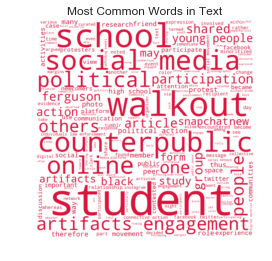

In [7]:
# Word Cloud of Participants on the Margin
wordCloud(textParticipantsMargin.lower())

In [19]:
words_nonexpert = text_non_expert.split()
words_expert = text_expert.split()
non_expert_dict = dict()
for word in words_nonexpert:
    if word.isalpha():
        if not word in non_expert_dict:
            non_expert_dict[word] = words_nonexpert.count(word)
print(sorted(non_expert_dict.items(),key=operator.itemgetter(1)))
    

[('slacktivism', 1), ('evgeny', 1), ('morozov', 1), ('below', 1), ('text', 1), ('talk', 1), ('subject', 1), ('received', 1), ('considerable', 1), ('attention', 1), ('blog', 1), ('elsewhere', 1), ('delivered', 1), ('festival', 1), ('arts', 1), ('electronica', 1), ('morning', 1), ('session', 1), ('dedicated', 1), ('someone', 1), ('affects', 1), ('grown', 1), ('increasingly', 1), ('skeptical', 1), ('attempt', 1), ('through', 1), ('explain', 1), ('let', 1), ('tell', 1), ('story', 1), ('gone', 1), ('seen', 1), ('famous', 1), ('months', 1), ('danish', 1), ('psychologist', 1), ('anders', 1), ('ideas', 1), ('spread', 1), ('conduct', 1), ('little', 1), ('experiment', 1), ('using', 1), ('fountain', 1), ('his', 1), ('main', 1), ('implied', 1), ('stated', 1), ('explicitly', 1), ('city', 1), ('authorities', 1), ('planning', 1), ('dismantle', 1), ('course', 1), ('seeded', 1), ('friends', 1), ('spreading', 1), ('immediately', 1), ('went', 1), ('growing', 1), ('after', 1), ('began', 1), ('grow', 1), (